### DoorDash Investment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../Group Assignment/DASH_A1.csv")
df

,Date,Close,High,Low,Open,Volume
0,24-02-2022,100.419998,100.919998,85.177002,86.879997,6639000.0
1,01-08-2024,108.199997,112.769997,105.905998,108.620003,7965400.0
2,11-02-2025,193.089996,194.000000,189.500000,190.919998,6771900.0
3,13-04-2021,149.460007,150.360001,143.550003,146.839996,2823500.0
4,17-09-2024,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...,...
1179,27-11-2024,178.440002,180.179993,177.699997,179.990005,2031100.0
1180,12-02-2025,200.889999,201.169998,195.197998,198.000000,9989400.0
1181,01-04-2025,182.419998,183.014999,178.259995,182.050003,3740700.0
1182,25-03-2024,137.820007,138.899994,136.740005,137.050003,2162800.0


In [3]:
print("Duplicates:", df.duplicated().sum())
print("Missing:", df.isnull().sum().sum())

Duplicates: 50
Missing: 108


In [4]:
df["Date"] = pd.to_datetime(df.Date)
df = df.set_index("Date").sort_index().drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1111 non-null   float64
 1   High    1110 non-null   float64
 2   Low     1119 non-null   float64
 3   Open    1119 non-null   float64
 4   Volume  1108 non-null   float64
dtypes: float64(5)
memory usage: 53.2 KB


/tmp/ipykernel_6311/203464963.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df.Date)


In [5]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [6]:
print("Duplicates:", df.duplicated().sum())
print("Missing:", df.isnull().sum().sum())

Duplicates: 0
Missing: 103


In [7]:
df[df.isnull().any(axis=1)]

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-17,154.210007,161.660004,NaN,159.100006,6369800.0
2021-01-13,NaN,215.500000,188.070007,192.410004,6058800.0
2021-02-05,NaN,190.916000,180.244995,189.570007,1521400.0
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
...,...,...,...,...,...
2025-04-11,180.490005,NaN,173.809998,178.520004,3451700.0
2025-04-25,187.759995,191.100006,NaN,187.220001,4515100.0
2025-05-01,196.199997,197.750000,NaN,194.404999,4151600.0


In [8]:
df.sort_index(inplace=True)

df['Open'] = df['Open'].fillna(df['Close'].shift(1))
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [9]:
df['Close'] = df["Close"].ffill()
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [10]:
df["High"] = df["High"].interpolate(method="linear")
df["Low"] = df["Low"].interpolate(method="linear")

df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [11]:
rows_zero = df.loc[df["Open"].eq(df["Close"])]
rows_zero

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-09,173.720001,173.426005,168.840004,173.720001,NaN


In [12]:
zeroVol = df['Volume'].isna() & (df["Open"] == df["Close"])
df.loc [zeroVol, 'Volume'] = 0

df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [13]:
rows_zero = df.loc[df["Open"].eq(df["Close"])]
rows_zero

,Close,High,Low,Open,Volume
Date,,,,,
2025-01-09,173.720001,173.426005,168.840004,173.720001,0.0


In [14]:
median_test = df.loc[df['Volume'].isna() & (df["Open"] != df["Close"])]
median_test

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
2021-07-09,178.559998,181.649994,176.539993,180.660004,NaN
2021-08-02,174.289993,179.529999,169.800003,175.350006,NaN
2021-08-25,188.250000,190.119995,184.550003,185.449997,NaN
2021-10-08,204.419998,207.990005,204.149994,204.899994,NaN
2022-05-02,82.260002,85.370003,78.790001,81.620003,NaN
2022-07-25,71.760002,74.820000,70.349998,73.120003,NaN
2022-10-24,44.430000,44.959999,41.365002,44.599998,NaN


In [15]:
median_vol =df["Volume"].median()
median_test = df['Volume'].isna() & (df["Open"] != df["Close"])

df.loc[median_test,"Volume"] = median_vol

#Test
print(df.Volume, '2020-12-20')


Date
2020-12-09    25373700.0
2020-12-10     3506600.0
2020-12-11     4760600.0
2020-12-14     7859600.0
2020-12-15     5017000.0
                 ...    
2025-06-09     2710300.0
2025-06-10     3916700.0
2025-06-11     3091500.0
2025-06-12     2510400.0
2025-06-13      616326.0
Name: Volume, Length: 1134, dtype: float64 2020-12-20


In [16]:
median_test

Date
2020-12-09    False
2020-12-10     True
2020-12-11    False
2020-12-14    False
2020-12-15    False
              ...  
2025-06-09    False
2025-06-10    False
2025-06-11    False
2025-06-12    False
2025-06-13    False
Length: 1134, dtype: bool

In [17]:
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [18]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


,Close,High,Low,Open,Volume,Returns,LastClose,LogReturns,Momentum_20,FastMA,Vol,Day,SMA,Dev,HighBand,LowBand
Date,,,,,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday,NaN,NaN,NaN,NaN
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thursday,NaN,NaN,NaN,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Friday,NaN,NaN,NaN,NaN
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Monday,NaN,NaN,NaN,NaN
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN


## Feature Engineering

In [19]:
df["Returns"] = df.Close.pct_change()
df.Returns

Date
2020-12-09         NaN
2020-12-10   -0.018521
2020-12-11   -0.059140
2020-12-14   -0.085714
2020-12-15   -0.006938
                ...   
2025-06-09   -0.004395
2025-06-10   -0.011587
2025-06-11    0.013165
2025-06-12   -0.005510
2025-06-13    0.007017
Name: Returns, Length: 1134, dtype: float64

In [20]:
df["LastClose"] = df.Close.shift()
df["LogReturns"] = np.log(df.Close/df.LastClose)

df["LogReturns"]

Date
2020-12-09         NaN
2020-12-10   -0.018695
2020-12-11   -0.060961
2020-12-14   -0.089612
2020-12-15   -0.006962
                ...   
2025-06-09   -0.004404
2025-06-10   -0.011654
2025-06-11    0.013079
2025-06-12   -0.005525
2025-06-13    0.006993
Name: LogReturns, Length: 1134, dtype: float64

In [21]:
df['Momentum_20'] = df['Close'] - df['Close'].shift(20)
df["Momentum_20"]

Date
2020-12-09          NaN
2020-12-10          NaN
2020-12-11          NaN
2020-12-14          NaN
2020-12-15          NaN
                ...    
2025-06-09    33.970001
2025-06-10    22.869995
2025-06-11    20.000000
2025-06-12    19.760010
2025-06-13    21.019989
Name: Momentum_20, Length: 1134, dtype: float64

In [22]:
# Fast MA suppose to pick up few latest days, sensitive to change in ST. rolling function with no of days (Period)
df["FastMA"] = df.Close.rolling(20).mean()
df["FastMA"]

Date
2020-12-09           NaN
2020-12-10           NaN
2020-12-11           NaN
2020-12-14           NaN
2020-12-15           NaN
                 ...    
2025-06-09    206.409998
2025-06-10    207.553498
2025-06-11    208.553498
2025-06-12    209.541499
2025-06-13    210.592498
Name: FastMA, Length: 1134, dtype: float64

In [23]:
df["Vol"] = df.Returns.rolling(20).std()
df.Vol

Date
2020-12-09         NaN
2020-12-10         NaN
2020-12-11         NaN
2020-12-14         NaN
2020-12-15         NaN
                ...   
2025-06-09    0.017753
2025-06-10    0.015859
2025-06-11    0.014953
2025-06-12    0.014976
2025-06-13    0.014958
Name: Vol, Length: 1134, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1134 entries, 2020-12-09 to 2025-06-13
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        1134 non-null   float64
 1   High         1134 non-null   float64
 2   Low          1134 non-null   float64
 3   Open         1134 non-null   float64
 4   Volume       1134 non-null   float64
 5   Returns      1133 non-null   float64
 6   LastClose    1133 non-null   float64
 7   LogReturns   1133 non-null   float64
 8   Momentum_20  1114 non-null   float64
 9   FastMA       1115 non-null   float64
 10  Vol          1114 non-null   float64
dtypes: float64(11)
memory usage: 106.3 KB


In [25]:
df["Day"] = df.index.day_name()
df

,Close,High,Low,Open,Volume,Returns,LastClose,LogReturns,Momentum_20,FastMA,Vol,Day
Date,,,,,,,,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
2020-12-10,186.000000,187.695007,172.636002,179.710007,3506600.0,-0.018521,189.509995,-0.018695,NaN,NaN,NaN,Thursday
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0,-0.059140,186.000000,-0.060961,NaN,NaN,NaN,Friday
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0,-0.085714,175.000000,-0.089612,NaN,NaN,NaN,Monday
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0,-0.006938,160.000000,-0.006962,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0,-0.004395,218.449997,-0.004404,33.970001,206.409998,0.017753,Monday
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0,-0.011587,217.490005,-0.011654,22.869995,207.553498,0.015859,Tuesday
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0,0.013165,214.970001,0.013079,20.000000,208.553498,0.014953,Wednesday


In [26]:
mean_return = df["Returns"].mean()
mean_return

threshold = mean_return + df.Returns.std() * 4
threshold

condition = df.Returns > threshold
df[condition]

,Close,High,Low,Open,Volume,Returns,LastClose,LogReturns,Momentum_20,FastMA,Vol,Day
Date,,,,,,,,,,,,
2021-01-12,191.990005,201.929993,162.615005,165.500000,7081800.0,0.149641,167.000000,0.139450,16.990005,154.739500,0.056770,Tuesday
2021-05-14,141.070007,146.630005,123.570000,125.000000,15264700.0,0.221491,115.489998,0.200072,-8.419998,138.449501,0.065840,Friday
2023-11-02,87.790001,90.339996,84.389999,85.089996,12346100.0,0.156653,75.900002,0.145531,13.980003,75.925500,0.045204,Thursday


In [27]:
mean_Vol = df["Volume"].mean()
mean_Vol

threshold = mean_Vol + df.Volume.std() * 6
threshold

condition = df.Volume > threshold
df[condition]

,Close,High,Low,Open,Volume,Returns,LastClose,LogReturns,Momentum_20,FastMA,Vol,Day
Date,,,,,,,,,,,,
2022-02-17,105.029999,116.000000,100.529999,115.600998,47405700.0,0.106861,94.889999,0.101528,-21.750000,103.309499,0.070378,Thursday
2023-12-15,101.570000,103.309998,100.220001,102.739998,30556000.0,-0.001867,101.760002,-0.001869,6.480003,97.266250,0.012769,Friday
2025-03-21,190.619995,194.399994,187.197006,190.720001,73637400.0,-0.011973,192.929993,-0.012045,-9.320007,189.258000,0.030139,Friday


In [28]:
plt.style.use('ggplot')

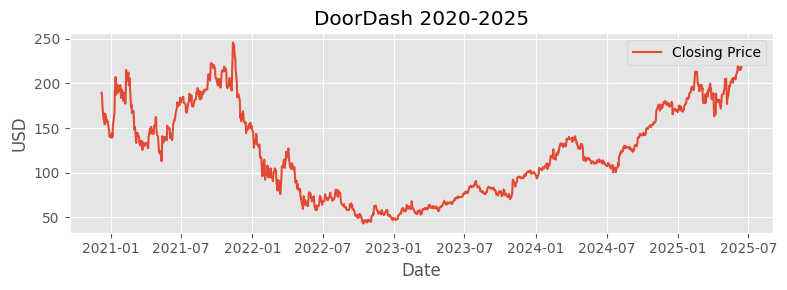

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 3))
plt.title("DoorDash 2020-2025")
plt.xlabel("Date")
plt.ylabel("USD")

# Plot the closing price
plt.plot(df.Close, label="Closing Price")

# Add a legend to the plot
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
# Adding these as features so the calculation of the Bollinger Bands is easier
df['SMA'] = df['Close'].rolling(window=20).mean()
df['Dev'] = df['Close'].rolling(window=20).std()

# Using the above features to calculate the bands
df['HighBand'] = df['SMA'] + 2 * df['Dev']
df['LowBand'] = df['SMA']  - 2 * df['Dev']

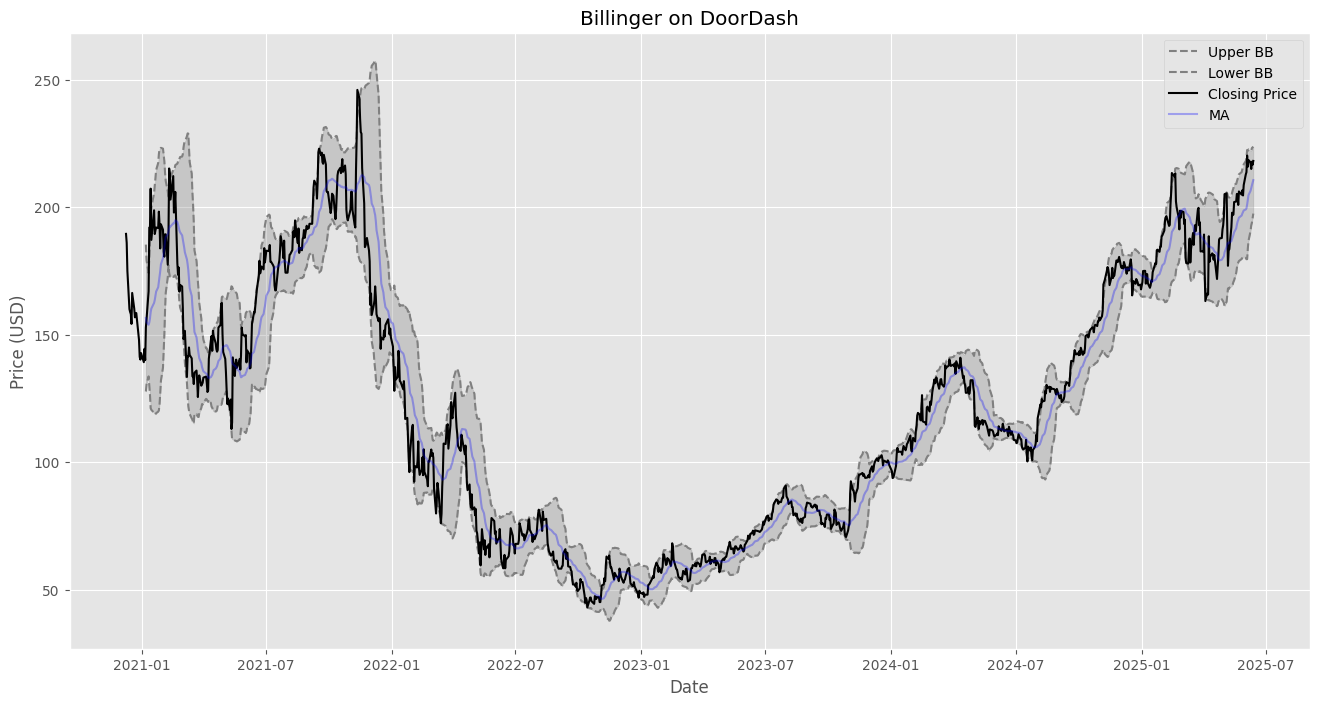

In [31]:
plt.figure(figsize = (16,8))
plt.title("Billinger on DoorDash")
plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.plot(df.HighBand, label = "Upper BB", color = "grey", linestyle = "--")
plt.plot(df.LowBand, label = "Lower BB", color = "grey", linestyle = "--")
plt.fill_between(df.index, df.HighBand, df.LowBand, color = "grey", alpha = 0.3)
plt.plot(df.Close, label = "Closing Price", color = "black")
plt.plot(df.SMA, label = "MA", color = "blue", alpha = 0.3)
plt.legend()
plt.show()


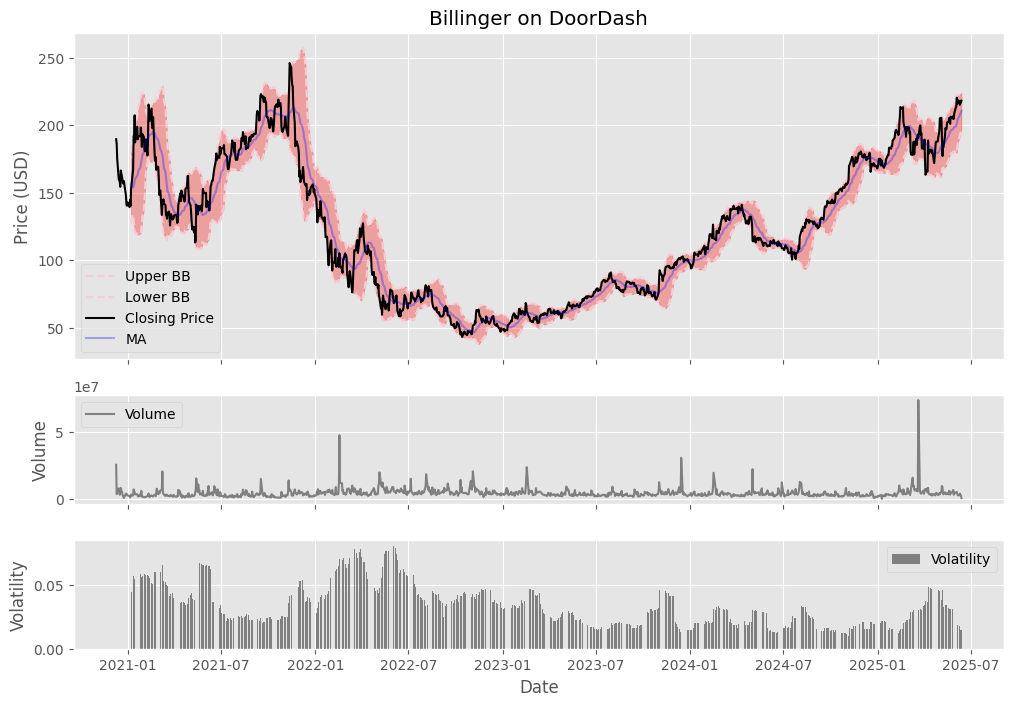

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- Main Plot: Bollinger Bands ---
ax1.set_title("Billinger on DoorDash")
ax1.set_ylabel("Price (USD)")
ax1.plot(df.HighBand, label="Upper BB", color="#F7CCD2", linestyle="--")
ax1.plot(df.LowBand, label="Lower BB", color="#F7CCD2", linestyle="--")
ax1.fill_between(df.index, df.HighBand, df.LowBand, color="red", alpha=0.3)
ax1.plot(df.Close, label="Closing Price", color="black")
ax1.plot(df.SMA, label="MA", color="blue", alpha=0.3)
ax1.legend()

# --- Subplot 2: Volume ---
ax2.set_ylabel("Volume")
ax2.plot(df.Volume, label="Volume", color="grey")
ax2.legend()

# --- Subplot 3: Volatility ---
ax3.set_ylabel("Volatility")
ax3.set_xlabel("Date")
ax3.bar(df.index,df.Vol, label="Volatility", color="grey")
ax3.legend()

plt.show()